In [46]:
import os

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import lmfit

from Simulator_new import Simulation

plt.rcParams.update({'font.size': 14})
data_loc = r'D:\Uni\Master\Advanced Computational Fluid and Plasma Dynamics\Project\data'
img_loc = r'D:\Uni\Master\Advanced Computational Fluid and Plasma Dynamics\Project_tex\images'

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


In [24]:
files = os.listdir(f'{data_loc}/data1')
time_arr = None
values = []
for index, file in enumerate(files):
    data = Simulation.load(f'{data_loc}/data1/{file}')
    if time_arr is None:
        time_arr = data.save_times
        start_index = np.searchsorted(time_arr, 200)
        time_arr = time_arr[start_index:]

    values.append(data.total_energy[start_index:])
    print(f'\r {index}', end='')
values = np.array(values)
values_avg = np.average(values, axis=0)

 34

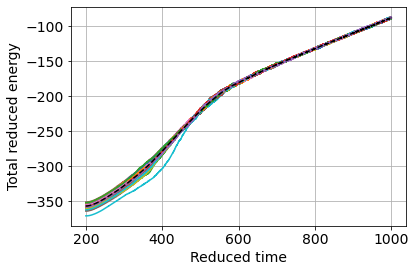

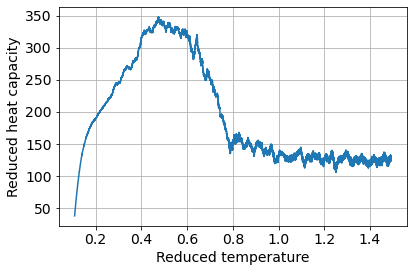

In [27]:
temperatures = 0.1+ (time_arr-time_arr[0])*(1.4/(time_arr[-1]-time_arr[0]))
plt.figure()
plt.plot(time_arr, values.T)
plt.plot(time_arr, values_avg, 'k--')
plt.ylabel('Total reduced energy')
plt.xlabel('Reduced time')
plt.grid()
plt.tight_layout()
plt.savefig(f'{img_loc}/1_1.png', dpi=200)
plt.show()

avg_num = 1000
h_avg_num = int(avg_num/2)
plt.figure()
plt.plot(temperatures[h_avg_num:-h_avg_num], moving_average(np.diff(values_avg)/(temperatures[1]-temperatures[0]), avg_num))
plt.xlabel('Reduced temperature')
plt.ylabel('Reduced heat capacity')
plt.grid()
plt.tight_layout()
plt.savefig(f'{img_loc}/1_2.png', dpi=200)
plt.show()


In [28]:
files = os.listdir(f'{data_loc}/data2')
result = {}
for index, file in enumerate(files):
    data = Simulation.load(f'{data_loc}/data2/{file}')
    start_index = np.searchsorted(data.save_times, 200)
    cutoff = int(file.split('_')[-1].split('.')[0])
    result[file] = [data.save_times[start_index:], data.total_energy[start_index:], cutoff, data.runtime]

    print(f'\r {index}', end='')

 11

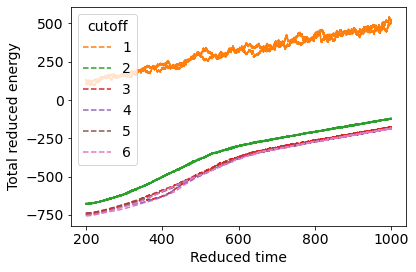

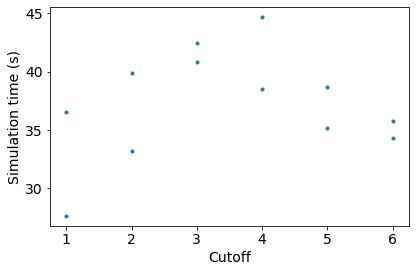

In [29]:
cutoff = []
runtime = []
plt.figure()
vals = []
for key, values in result.items():
    if values[2] in vals:
        plt.plot(values[0], values[1], f'C{values[2]}--')
    else:
        vals.append(values[2])
        plt.plot(values[0], values[1], f'C{values[2]}--', label=values[2])
    cutoff.append(values[2])
    runtime.append(values[3])
plt.legend(title='cutoff')
plt.xlabel('Reduced time')
plt.ylabel('Total reduced energy')
plt.tight_layout()
plt.savefig(f'{img_loc}/2_1.png', dpi=200)
plt.show()

plt.figure()
plt.plot(cutoff, runtime, 'C0.')
plt.xlabel('Cutoff')
plt.ylabel('Simulation time (s)')
plt.tight_layout()
plt.savefig(f'{img_loc}/2_2.png', dpi=200)
plt.show()

# temperatures = 0.1 + (time_arr - time_arr[0]) * (1.4 / (time_arr[-1] - time_arr[0]))
# avg_num = 1000
# h_avg_num = int(avg_num / 2)
# plt.figure()
# plt.plot(temperatures[h_avg_num:-h_avg_num], moving_average(np.diff(values_avg), avg_num))
# plt.xlabel('Reduced temperature')
# plt.ylabel('Heat capacity')
# plt.show()

In [3]:
files = os.listdir(f'{data_loc}/data8')
result = {}
for index, file in enumerate(files):
    data = Simulation.load(f'{data_loc}/data8/{file}')
    start_index = np.searchsorted(data.save_times, 200)
    cutoff = int(file.split('_')[-1].split('.')[0])
    result[file] = [data.save_times[start_index:], data.total_energy[start_index:], cutoff, data.runtime]

    print(f'\r {index}', end='')

 17

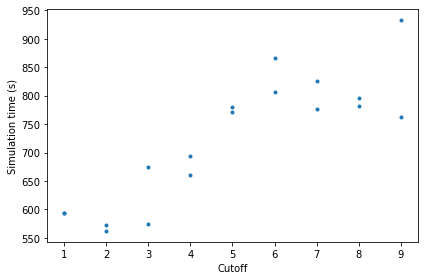

In [4]:
cutoff = []
runtime = []
vals = []
for key, values in result.items():
    cutoff.append(values[2])
    runtime.append(values[3])

plt.figure()
plt.plot(cutoff, runtime, 'C0.')
plt.xlabel('Cutoff')
plt.ylabel('Simulation time (s)')
plt.tight_layout()
plt.savefig(f'{img_loc}/2_3.png', dpi=200)
plt.show()

In [30]:
files = os.listdir(f'{data_loc}/data4')
result = {}
for index, file in enumerate(files):
    data = Simulation.load(f'{data_loc}/data4/{file}')
    start_index = np.searchsorted(data.save_times, 200)
    result[file] = [data.save_times[start_index:], data.total_energy[start_index:], data.dt]

    print(f'\r {index}', end='')

 3

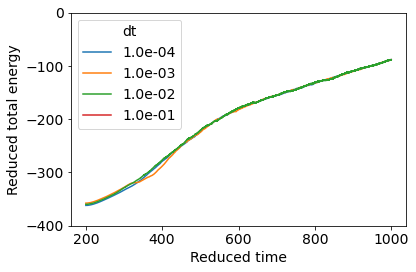

In [31]:
plt.figure()
for key, values in result.items():
    plt.plot(values[0], values[1], '-', label=f'{values[2]:.1e}')
plt.ylim(-400, 0)
plt.legend(title='dt')
plt.xlabel('Reduced time')
plt.ylabel('Reduced total energy')
plt.tight_layout()
plt.savefig(f'{img_loc}/3_1.png', dpi=200)
plt.show()

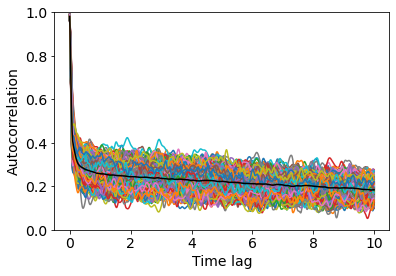

 0

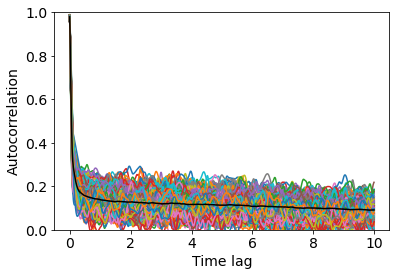

 1

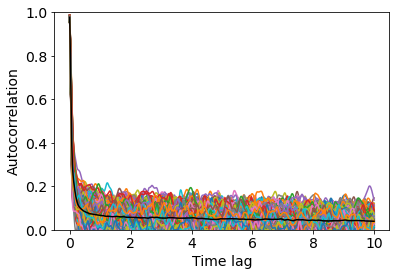

 2

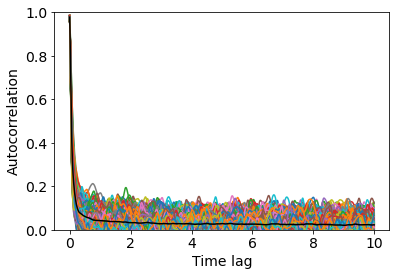

 3

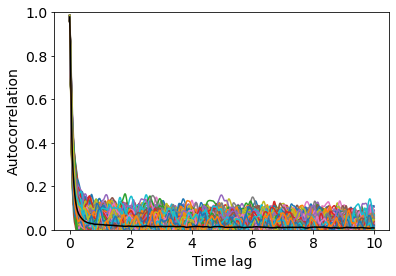

 4

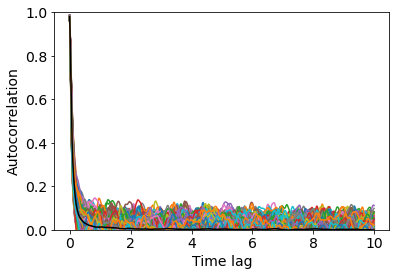

 5

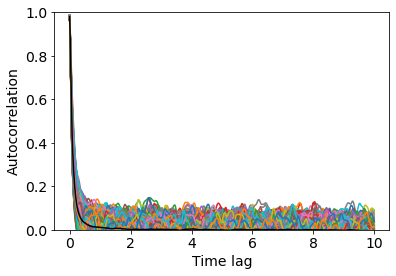

 6

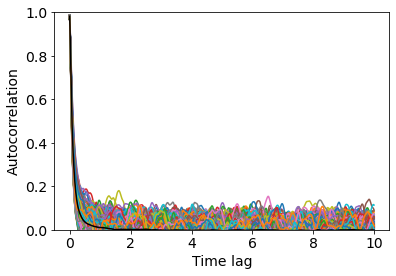

 7

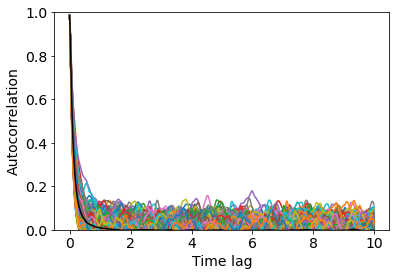

 8

In [37]:
files = os.listdir(f'{data_loc}/data11')
result_dict = {}
dt = 0
for index, file in enumerate(files):
    data = Simulation.load(f'{data_loc}/data11/{file}')
    v = np.sqrt(np.sum(data.total_particle_velocities**2, axis=-1))
    # start = int(len(v)/10)
    nlags = 1000
    average = np.zeros(nlags)
    dt = data.dt
    plt.figure()
    for i in range(v.shape[1]):
        result = sm.tsa.acf(v[:, i], nlags=nlags)
        average += result[1:]
        plt.plot(dt*np.arange(0, len(result[1:])), result[1:])
    average /= v.shape[1]
    temperature = float('.'.join(file.split('_')[-1].split('.')[0:2]))
    result_dict[temperature] = average
    plt.plot(dt*np.arange(0, len(average)),  average, 'k-')
    plt.ylabel('Autocorrelation')
    plt.xlabel('Time lag')
    plt.ylim(0, 1)
    plt.savefig(f'{img_loc}/4_T{temperature}.png')
    plt.show()
    # start_index = np.searchsorted(data.save_times, 200)
    # result[file] = [data.save_times[start_index:], data.total_energy[start_index:], data.dt]
    # break
    print(f'\r {index}', end='')


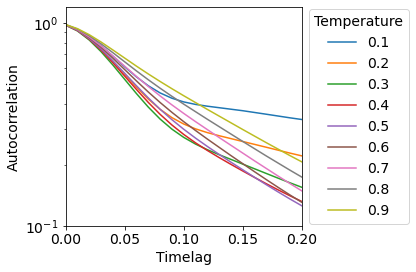

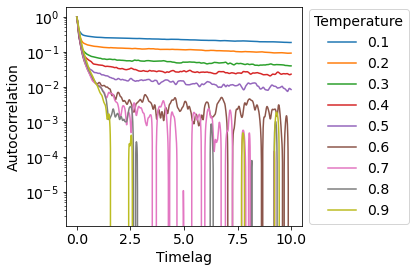

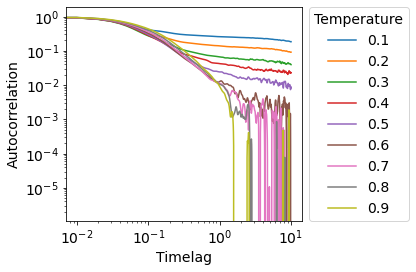

TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=0

In [65]:
plt.figure()
for key, value in result_dict.items():
    plt.semilogy(dt*np.arange(0, len(value)), value, label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Temperature')
plt.ylabel('Autocorrelation')
plt.xlabel('Timelag')
plt.xlim(0, 0.2)
plt.ylim(1e-1, 1.2)
plt.tight_layout()
plt.savefig(f'{img_loc}/4_1_total.png', dpi=200)
plt.show()

plt.figure()
for key, value in result_dict.items():
    plt.semilogy(dt*np.arange(0, len(value)), value, label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Temperature')
plt.ylabel('Autocorrelation')
plt.xlabel('Timelag')
plt.tight_layout()
plt.savefig(f'{img_loc}/4_2_total.png', dpi=200)
plt.show()

plt.figure()
for key, value in result_dict.items():
    plt.loglog(dt*np.arange(0, len(value)), value, label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Temperature')
plt.ylabel('Autocorrelation')
plt.xlabel('Timelag')
plt.tight_layout()
plt.savefig(f'{img_loc}/4_3_total.png')
plt.show()


model = lmfit.models.ExponentialModel(prefix='Exp' ) #+ lmfit.models.PowerLawModel(prefix='Power')
params = model.make_params()
params['Expdecay'].value = -0.001
params['Expdecay'].max = 0
# params['Powerexponent'].value = -1e-2
# params['Powerexponent'].max = 0

exponent = []
vals = []
for key, value in result_dict.items():
    x = dt*np.arange(0, len(value))
    index = np.searchsorted(x, 2)
    result = model.fit(value[index:], params, x=x[index:], nan_policy='omit')
    result.plot_fit()
    # print(result.fit_report())
    exponent.append(result.params['Expdecay'].value)
    vals.append(key)
    ax = plt.gca()
    ax.set_yscale('log')
    plt.show()

plt.figure()
plt.plot(vals, exponent)
plt.show()
